In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import poisson

year = 1999

# Load data
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
date = {}
time = {}
month_number = {}
for number, month in enumerate(months):
    data = pd.read_csv ("./data/call_center/" + month + ".txt", delim_whitespace = True)#, sep = '\t')
    date[month] = data["date"]  
    time[month] = data["vru_entry"]
    month_number[month] = number + 1
print(date["January"][3])
print(time["January"][10:15])
hour = time["January"][0].split(":")[0]
print(hour)
hour = time["January"][14].split(":")[0]
print(hour)
print(month_number["March"])

990101
10     9:16:49
11     9:27:03
12     9:41:14
13     9:47:49
14    10:04:47
Name: vru_entry, dtype: object
0
10
3


In [3]:
def compute_counts(time_ini,time_end,month,verbose):
    counts = np.zeros(31)
    if verbose:
        print("Month: " + month)
    for index, time_call in enumerate(time[month]):
        if verbose:
            print("Date: " + str(date[month][index]) + " Time: " + time_call)
        day = int(date[month][index]) % 100
        hour = int(time_call.split(":")[0])
        if verbose:
            print("Date: " + str(date[month][index]) + " Time: " + time_call + " Day: " + str(day) + " Hour: " + str(hour) )
        if time_ini <= hour and hour < time_end:
            counts[day-1] += 1
            if verbose:
                print("count++")
    return counts
verbose = False
counts = compute_counts(9,10,"October",verbose)
print(counts)


[ 90.   2. 146. 139. 145. 110. 146.  89.   1. 165. 126. 132. 129.  98.
  81.   1. 163. 142.  98.  75. 134.  83.   0.  98. 110. 119. 111.  90.
  67.   1. 177.]


In [4]:
time_ini = 6
time_end = 7
verbose = False
for month in months:
    print(month)
    counts = compute_counts(time_ini,time_end,month,verbose)
    print(counts)
    print(sum(counts))

January
[ 5.  0.  6.  7.  2.  3.  3.  1.  0.  2.  0.  0. 23.  2.  2.  0.  4. 11.
  7.  0.  4.  2.  0.  2.  4.  4.  0.  4.  2.  0.  5.]
105.0
February
[ 9.  9.  5.  2.  2.  0.  6.  4.  3.  9.  4.  1.  0.  5.  9.  4.  3. 12.
  0.  0.  2.  4.  5.  2.  3.  8.  0.  1.  0.  0.  0.]
112.0
March
[ 8.  1.  7. 11.  5.  0.  6.  7.  0.  3.  4.  9.  0.  4.  0.  5.  8.  8.
  5.  0. 16.  6.  7. 10.  4.  4.  0. 13. 19.  8. 11.]
189.0
April
[ 0.  0.  0. 16.  3.  0.  0.  3.  5.  0.  6.  1.  5.  2.  5.  2.  0.  7.
  1. 14.  1.  7.  1.  0.  6.  5.  6.  4.  6.  4.  0.]
110.0
May
[ 0. 10. 23.  6.  4.  6.  8.  0. 10. 14.  6.  3.  5.  3.  0.  4.  5.  2.
  4.  5.  0.  0.  8. 11.  6.  7.  4.  3.  0.  7.  7.]
171.0
June
[16. 10.  2.  7.  0.  4.  9.  4. 10.  7.  5.  0. 16.  4.  7.  7.  3.  2.
  0.  4.  7.  4.  5.  3.  1.  0.  4.  2.  6.  9.  0.]
158.0
July
[20.  5.  0.  8. 12.  6.  6.  4.  5.  0.  9.  7.  7.  3.  3.  2.  0.  3.
  5.  3.  1.  0.  3.  0.  8.  2.  1. 11.  4.  1.  0.]
139.0
August
[13. 19. 10.  5.  5

In [5]:
def is_weekend(month_number,day):
    date_object = datetime.date(year,month_number,day)
    weekday = date_object.weekday()
    return weekday == 5 or weekday == 6

    
print(is_weekend(1,1))
print(is_weekend(1,2))
print(is_weekend(3,12))
print(is_weekend(3,13))   

False
True
False
True


[0.09302326 0.0620155  0.10852713 0.10077519 0.14728682 0.11627907
 0.0620155  0.10077519 0.04651163 0.05426357 0.02325581 0.03100775
 0.00775194 0.         0.01550388 0.         0.00775194 0.
 0.         0.00775194 0.         0.         0.         0.01550388
 0.        ]
[5.50801823e-03 2.86502344e-02 7.45128189e-02 1.29194061e-01
 1.68002354e-01 1.74774542e-01 1.51516431e-01 1.12588622e-01
 7.32044235e-02 4.23084997e-02 2.20069793e-02 1.04064011e-02
 4.51078496e-03 1.80485194e-03 6.70573452e-04 2.32534773e-04
 7.55963337e-05 2.31304788e-05 6.68413060e-06 1.82988643e-06
 4.75912322e-07 1.17880092e-07 2.78708744e-08 6.30311989e-09
 1.36608315e-09]
[0.03030303 0.07575758 0.08333333 0.11363636 0.11363636 0.15151515
 0.09090909 0.10606061 0.0530303  0.0530303  0.03030303 0.01515152
 0.03787879 0.00757576 0.         0.00757576 0.00757576 0.00757576
 0.         0.00757576 0.00757576 0.         0.         0.
 0.        ]
Error of nonparametric estimate: 0.02012
Error of parametric estimate: 

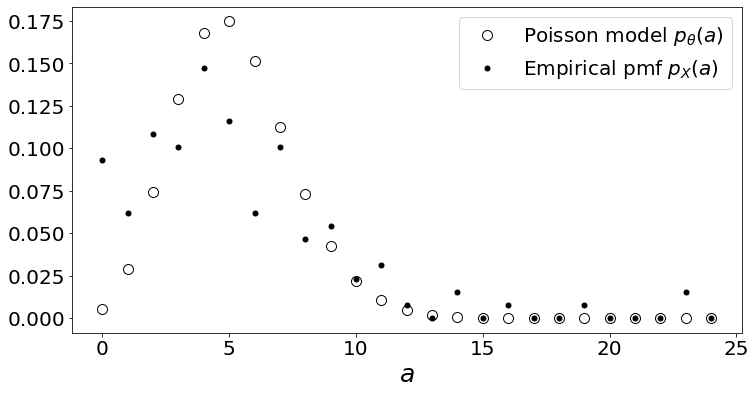

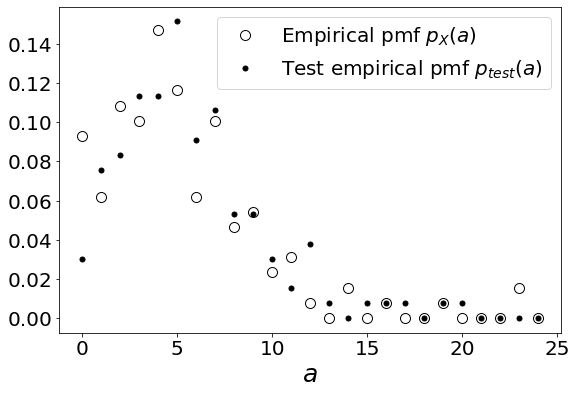

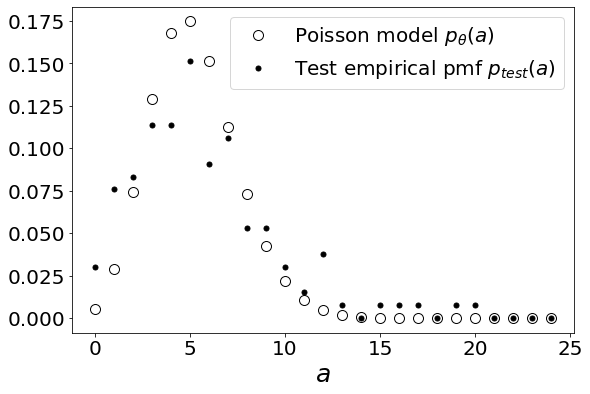

In [6]:
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
def empirical_pmf(months, max_count,time_ini,time_end,verbose):
    count_vector = np.zeros(max_count)
    for month in months:
        if verbose:
            print("Month: " + month)
        verbose_counts = False
        counts = compute_counts(time_ini,time_end,month,verbose_counts)
        for index, count in enumerate(counts):
            day = index + 1
            if day <= days_in_month[month_number[month]-1]:
                weekend = is_weekend(month_number[month],day)
                if verbose:
                    print("Day " + str(day) + " Weekend: " + str(weekend))
                if not weekend:
                    count_vector[int(count)] += 1.
                    if verbose:
                        print("Count " + str(count) + " ++")
    pmf = count_vector / sum(count_vector)
    if verbose:
        print(count_vector)
        print(pmf)
    return pmf

def poisson_model(months, max_count,time_ini,time_end,verbose):
    average_aux = 0
    total = 0
    for month in months:
        if verbose:
            print("Month: " + month)
        verbose_counts = False
        counts = compute_counts(time_ini,time_end,month,verbose_counts)
        for index, count in enumerate(counts):
            day = index + 1
            if day <= days_in_month[month_number[month]-1]:
                weekend = is_weekend(month_number[month],day)
                if verbose:
                    print("Day " + str(day) + " Weekend: " + str(weekend))
                if not weekend: 
                    average_aux += count 
                    total += 1.
                    if verbose:
                        print("Count " + str(count) + " ++")
    lambda_param = average_aux / total
    if verbose:
        print("Poisson lambda parameter: " + print(lambda_param))
    pmf = poisson.pmf(np.arange(0,max_count,1), lambda_param)
    return pmf
    

training_months = ["January","February","March","April","May","June"]
test_months = ["July","August","September","October","November","December"]
time_ini = 6
time_end = 7
max_count = 25
verbose = False

empirical_pmf_train = empirical_pmf(training_months, max_count,time_ini,time_end,verbose)
poisson_fit = poisson_model(training_months, max_count,time_ini,time_end,verbose)
empirical_pmf_test = empirical_pmf(test_months, max_count,time_ini,time_end,verbose)

print(empirical_pmf_train)
print(poisson_fit)
print(empirical_pmf_test)

font_size = 25
font_size_legend = 20
font_size_ticks = 20

plt.figure(figsize=(12,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(range(max_count),poisson_fit,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
     label=r'Poisson model $p_{\theta}(a)$')
plt.plot(range(max_count),empirical_pmf_train,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
     label=r'Empirical pmf $p_{X}(a)$')
# plt.ylabel(r"$p_{X}(a)$",fontsize=font_size,labelpad = 10)
plt.xlabel(r'$a$',fontsize=font_size)
plt.legend(fontsize=font_size_legend)
plt.savefig('plots/call_center_parametric.pdf',bbox_inches="tight")

plt.figure(figsize=(9,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(range(max_count),empirical_pmf_train,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
     label=r'Empirical pmf $p_{X}(a)$')
plt.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
     label=r'Test empirical pmf $p_{test}(a)$')
# plt.ylabel(r"$p_{X}(a)$",fontsize=font_size,labelpad = 10)
plt.xlabel(r'$a$',fontsize=font_size)
plt.legend(fontsize=font_size_legend)
plt.savefig('plots/call_center_empirical_pmf_test.pdf',bbox_inches="tight")

plt.figure(figsize=(9,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(range(max_count),poisson_fit,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
     label=r'Poisson model $p_{\theta}(a)$')
plt.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
     label=r'Test empirical pmf $p_{test}(a)$')
# plt.ylabel(r"$p_{X}(a)$",fontsize=font_size,labelpad = 10)
plt.xlabel(r'$a$',fontsize=font_size)
plt.legend(fontsize=font_size_legend)
plt.savefig('plots/call_center_parametric_test.pdf',bbox_inches="tight")

nonparametric_error = np.std(empirical_pmf_train - empirical_pmf_test)
parametric_error = np.std(poisson_fit - empirical_pmf_test)
print("Error of nonparametric estimate: {:0.5f}".format(nonparametric_error))
print("Error of parametric estimate: {:0.5f}".format(parametric_error))


Training months: 
['January']
Error of nonparametric estimate: 0.05915
Error of parametric estimate: 0.03000
Training months: 
['January', 'February']
Error of nonparametric estimate: 0.04514
Error of parametric estimate: 0.02552
Training months: 
['January', 'February', 'March']
Error of nonparametric estimate: 0.03223
Error of parametric estimate: 0.02229
Training months: 
['January', 'February', 'March', 'April']
Error of nonparametric estimate: 0.02844
Error of parametric estimate: 0.02349
Training months: 
['January', 'February', 'March', 'April', 'May']
Error of nonparametric estimate: 0.02358
Error of parametric estimate: 0.02237
Training months: 
['January', 'February', 'March', 'April', 'May', 'June']
Error of nonparametric estimate: 0.02012
Error of parametric estimate: 0.02228


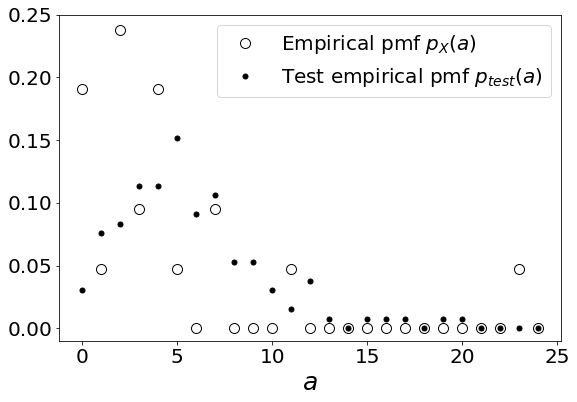

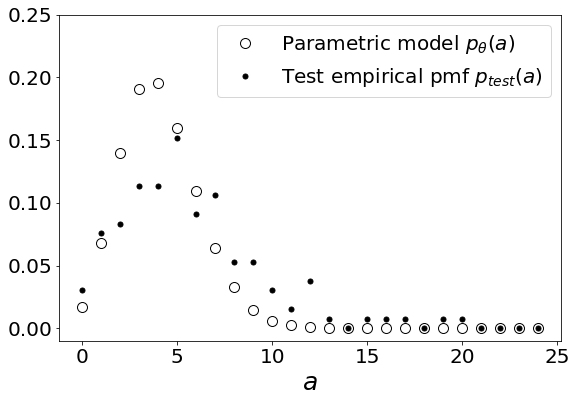

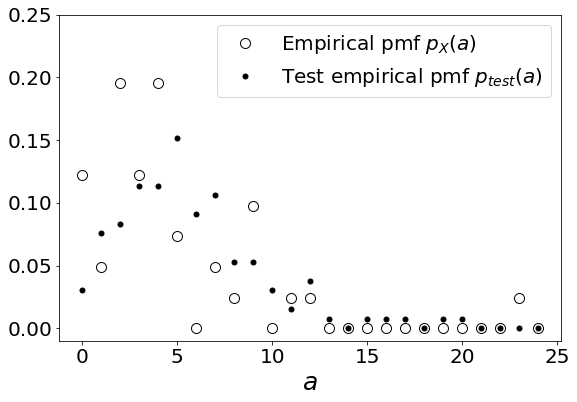

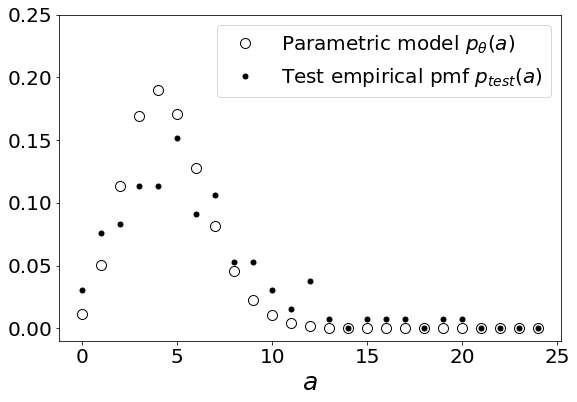

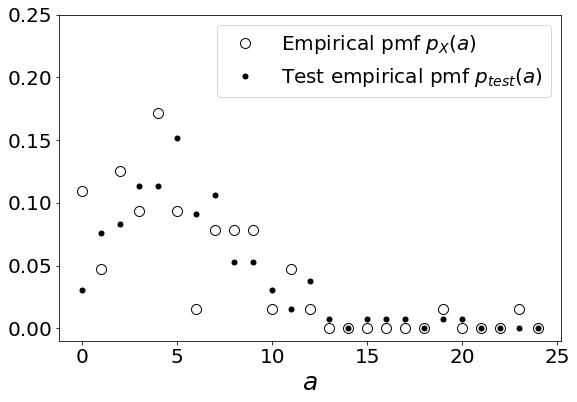

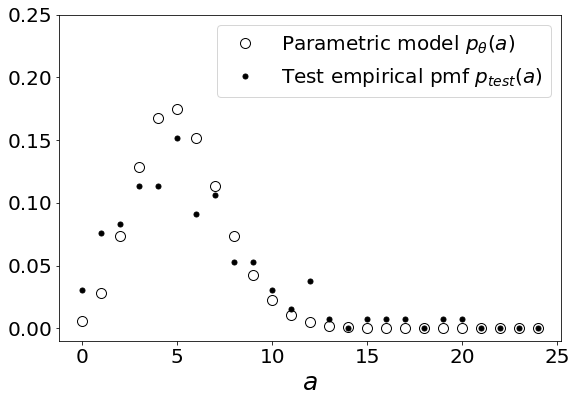

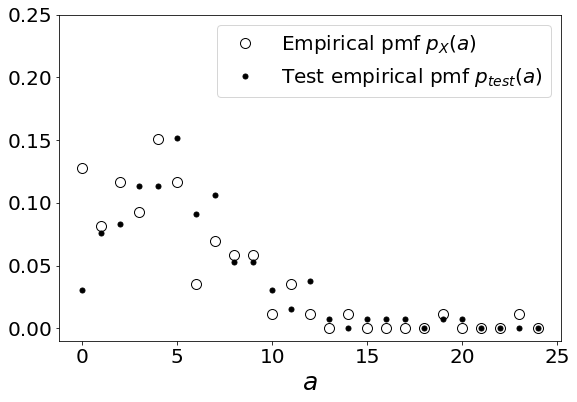

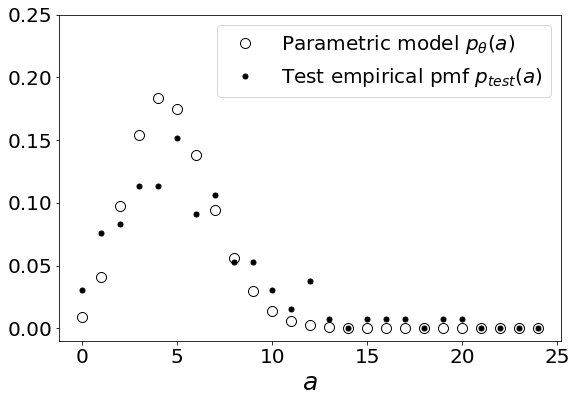

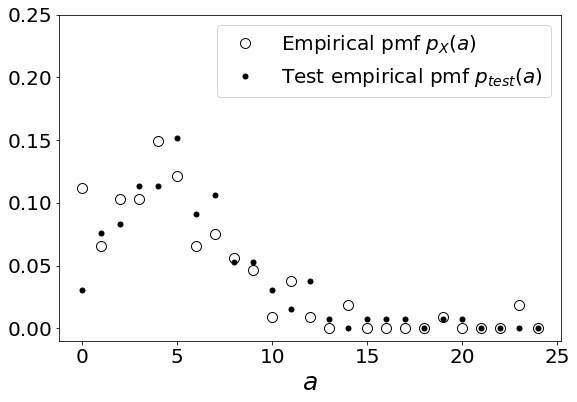

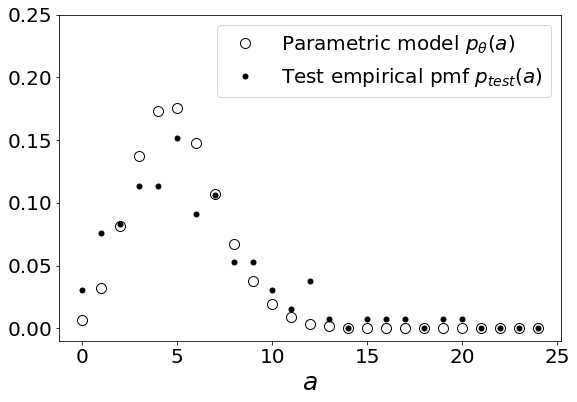

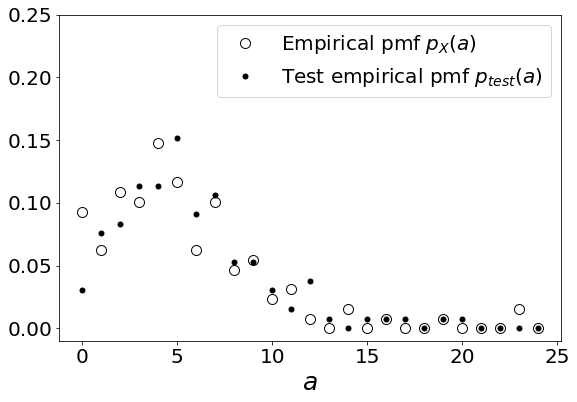

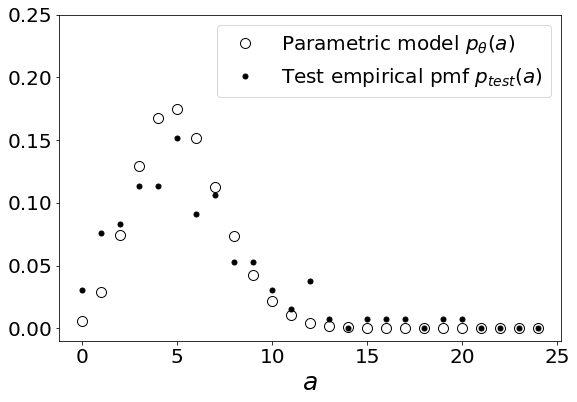

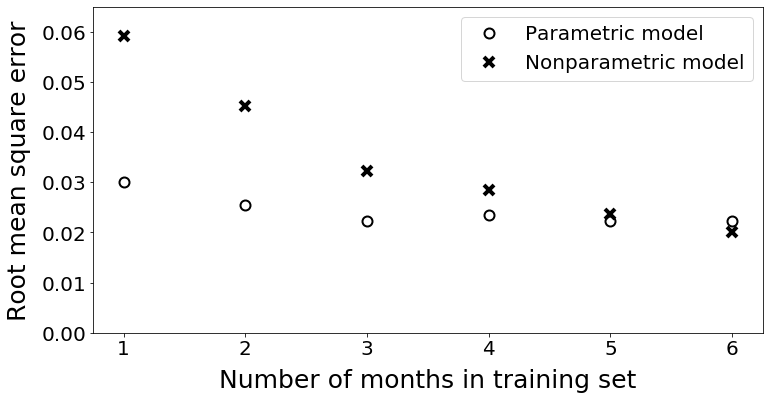

In [7]:
training_months = ["January","February","March","April","May","June"]
test_months = ["July","August","September","October","November","December"]
time_ini = 6
time_end = 7
max_count = 25
verbose = False

nonparametric_errors = []
parametric_errors = []
m = len(training_months)
y_max = 0.25
for month in np.arange(1,m+1):
    training_set = training_months[:month]
    print("Training months: ")
    print(training_set)
    empirical_pmf_train = empirical_pmf(training_set, max_count,time_ini,time_end,verbose)
    poisson_fit = poisson_model(training_set, max_count,time_ini,time_end,verbose)
    nonparametric_error = np.std(empirical_pmf_train - empirical_pmf_test)
    parametric_error = np.std(poisson_fit - empirical_pmf_test)
    nonparametric_errors.append(nonparametric_error)
    parametric_errors.append(parametric_error)
    print("Error of nonparametric estimate: {:0.5f}".format(nonparametric_error))
    print("Error of parametric estimate: {:0.5f}".format(parametric_error))
    
    plt.figure(figsize=(9,6))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(range(max_count),empirical_pmf_train,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
         label=r'Empirical pmf $p_{X}(a)$')
    plt.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
         label=r'Test empirical pmf $p_{test}(a)$')
    # plt.ylabel(r"$p_{X}(a)$",fontsize=font_size,labelpad = 10)
    plt.ylim([-0.01,y_max])
    plt.xlabel(r'$a$',fontsize=font_size)
    plt.legend(fontsize=font_size_legend)
    # plt.title("Training months: " + str(month),fontsize=font_size_legend)
    plt.savefig('plots/call_center_nonparametric_' + str(month) + '.pdf',bbox_inches="tight")
    
    plt.figure(figsize=(9,6))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(range(max_count),poisson_fit,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
         label=r'Parametric model $p_{\theta}(a)$')
    plt.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
         label=r'Test empirical pmf $p_{test}(a)$')
    # plt.ylabel(r"$p_{X}(a)$",fontsize=font_size,labelpad = 10)
    plt.ylim([-0.01,y_max])
    plt.xlabel(r'$a$',fontsize=font_size)
    plt.legend(fontsize=font_size_legend)
    # plt.title("Training months: " + str(month),fontsize=font_size_legend)
    plt.savefig('plots/call_center_parametric_' + str(month) + '.pdf',bbox_inches="tight")
    
plt.figure(figsize=(12,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(np.arange(1,m+1),parametric_errors,'o',mew=2,markersize=10,markerfacecolor='white',markeredgecolor="black",
     label=r'Parametric model')
plt.plot(np.arange(1,m+1),nonparametric_errors,'x',mew=4,markersize=10,markerfacecolor='black',markeredgecolor="black",
     label=r'Nonparametric model')
plt.ylabel("Root mean square error",fontsize=font_size,labelpad = 10)
plt.xlabel('Number of months in training set',fontsize=font_size,labelpad = 10)
plt.ylim([0,0.065])
plt.legend(fontsize=font_size_legend)
plt.savefig('plots/call_center_parametric_vs_nonparametric.pdf',bbox_inches="tight")